- CARICO TERMICO DI RADIAZIONE DI UN CILINDRO CON PARETI INTERNE DEL CRIOSTATO (ESCLUDO QUELLA DI BASE)

In [135]:
import numpy as np
import matplotlib.pyplot as plt


# Definizione costante di Stefan-Boltzmann
sigma = 5.670e-8  # W/m^2K^4

# Caratteristiche geometriche
h_crio = 30.6e-2 # altezza parete criostato APPROX!!
width_crio = 49.5e-2 # APPROX!!
length_crio = 54.5e-2 # APPROX!!
diam_cilindro = 10.5e-2 
h_cilindro = 11.6e-2

A1 = np.pi*diam_cilindro*h_cilindro + 2*np.pi*(diam_cilindro/2)**2 # superificie cilindro 
A2 = 2*((width_crio*h_crio)+(length_crio*h_crio)) + (width_crio*length_crio) # superficie pareti crio
T1 = 4 # temperatura cilindro
T2 = 55 # temperatura pareti
epsilon1 = 0.1 # emissività pareti !!APPROX
epsilon2 = 0.1 # emissività cilindro !!APPROX

# Calcolo di Q
Q = (sigma * A1 * (T2**4 - T1**4)) / (1/epsilon1 + (A1/A2) * (1/epsilon2 - 1))           

# Output del risultato
print(f"Superficie interna cilindro = {A1:.4e} m^2" )
print(f"Superficie esterna criostato = {A2:.4e} m^2" )
print( )
print(f"Q = {Q:.4e} W")


Superficie interna cilindro = 5.5583e-02 m^2
Superficie esterna criostato = 9.0626e-01 m^2

Q = 2.7329e-03 W


- PLOT 3D AL VARIARE DELL'EMISSIVITà

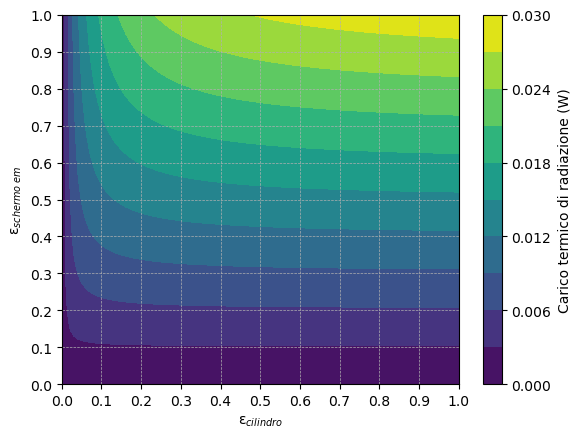

In [154]:
# Funzione carico(emissività pareti)
def Q(x, y):
    return ((sigma * A1 * (T2**4 - T1**4)) / (1/x + (A1/A2) * (1/y - 1)))

# Genera dati per x e y
epsilon_1_vals = np.linspace(0.00001, 1, 100) # vals sta per valori, 0.00001 cosi non divido per zero, emissività cilindro
epsilon_2_vals = np.linspace(0.00001, 1, 100) # emissività schermo em

# Prepara una matrice per i risultati di z
z_vals = np.zeros((len(epsilon_1_vals), len(epsilon_2_vals)))

# Calcola z per ogni coppia di estremi x e y    
for n, x in enumerate(epsilon_1_vals):
    for m, y in enumerate(epsilon_2_vals):
        z_vals[n, m] = Q(x, y)  # Usa x e y come estremi

# Crea un grafico 2D (scatter) in cui z è il colore
X, Y = np.meshgrid(epsilon_1_vals, epsilon_2_vals)
plt.contourf(X, Y, z_vals, levels=10, cmap='viridis')  # Usa contourf per mappa di densità

# Aggiungi una colorbar che rappresenta i valori di z
plt.colorbar(label='Carico termico di radiazione (W)')

# Etichette e titolo
plt.xlabel(r'ε$_{cilindro}$')
plt.ylabel(r'ε$_{schermo \ em}$')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Linee tratteggiate
plt.xticks(np.arange(0, 1.1, 0.1))  # Tick sull'asse x ogni 0.1
plt.yticks(np.arange(0, 1.1, 0.1))  # Tick sull'asse y ogni 0.1
#plt.title('Carico termico vs emissività')

# Mostra il grafico
plt.savefig("Carico_vs_emissività.pdf", format="pdf")
plt.show()

- PLOT CARICO VS EMISSIVITà DI ENTRAMBI

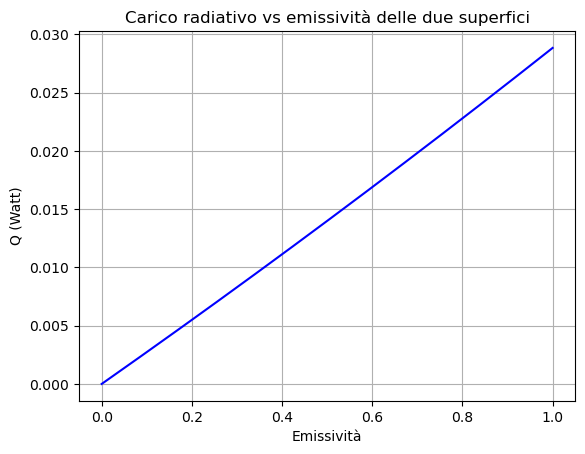

In [137]:
# Funzione carico(emissività pareti)
def y(epsilon):
    return ((sigma * A1 * (T2**4 - T1**4)) / (1/epsilon + (A1/A2) * (1/epsilon - 1)))

epsilon_range = np.linspace(0.00000001, 1, 1000)

# Valori di Q calcolati
Q_values = y(epsilon_range)

# Plot della funzione
plt.plot(epsilon_range, Q_values, label='Q=f(ε)', color='blue')
plt.title('Carico radiativo vs emissività delle due superfici')
plt.xlabel('Emissività')
plt.ylabel('Q (Watt)')
plt.grid(True)
#plt.legend()
plt.savefig("Carico_vs_emissività.pdf", format="pdf")
plt.show()

- PLOT CARICO RADIAZIONE VS EMISSIVITà PARETI CRIOSTATO (emissività cilindro fissata = 0.1)

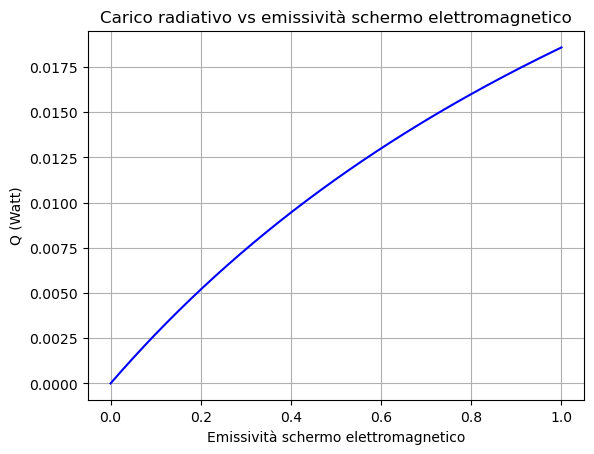

In [138]:
# Funzione carico(emissività pareti)
def y(epsilon1):
    return ((sigma * A1 * (T2**4 - T1**4)) / (1/epsilon1 + (A1/A2) * (1/epsilon2 - 1)))

epsilon_range = np.linspace(0.00000001, 1, 1000)

# Valori di Q calcolati
Q_values = y(epsilon_range)

# Plot della funzione
plt.plot(epsilon_range, Q_values, label='Q=f(ε)', color='blue')
plt.title('Carico radiativo vs emissività schermo elettromagnetico')
plt.xlabel('Emissività schermo elettromagnetico')
plt.ylabel('Q (Watt)')
plt.grid(True)
#plt.legend()
plt.show()


- PLOT CARICO RADIAZIONE VS EMISSIVITà CILINDRO (emissività pareti fissata = 0.1)

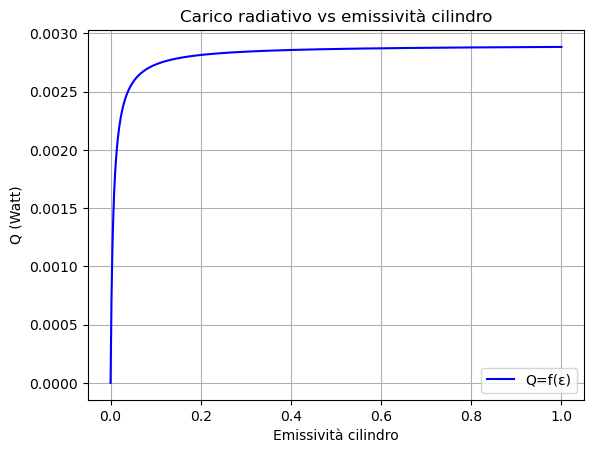

In [139]:
# Funzione carico (emissività cilindro)
def y(epsilon2):
    return ((sigma * A1 * (T2**4 - T1**4)) / (1/epsilon1 + (A1/A2) * (1/epsilon2 - 1)))

epsilon_range = np.linspace(0.00000001, 1, 1000)

# Valori di Q calcolati
Q_values = y(epsilon_range)

# Plot della funzione
plt.plot(epsilon_range, Q_values, label='Q=f(ε)', color='blue')
plt.title('Carico radiativo vs emissività cilindro')
plt.xlabel('Emissività cilindro')
plt.ylabel('Q (Watt)')
plt.grid(True)
plt.legend()
plt.show()

- VARIAZIONE DI EMISSIVITà DI ENTRAMBI (del cilindro e delle pareti del criostato)

In [140]:
 epsilon_max = 1
epsilon1 = 0.1
epsilon2 = 0.1

while epsilon1 < epsilon_max :
    epsilon1 += 0.05
    epsilon2 += 0.05
    
    Q = (sigma * A1 * (T2**4 - T1**4)) / (1/epsilon1 + (A1/A2) * (1/epsilon2 - 1))  
    print (f"ε1 = {epsilon1:.2f}  ε2 = {epsilon2:.2f}   --->    Q = {Q} Watt") 


ε1 = 0.15  ε2 = 0.15   --->    Q = 0.004111323158850381 Watt
ε1 = 0.20  ε2 = 0.20   --->    Q = 0.005497788409660563 Watt
ε1 = 0.25  ε2 = 0.25   --->    Q = 0.006892383206862781 Watt
ε1 = 0.30  ε2 = 0.30   --->    Q = 0.008295179262155939 Watt
ε1 = 0.35  ε2 = 0.35   --->    Q = 0.009706249133162871 Watt
ε1 = 0.40  ε2 = 0.40   --->    Q = 0.011125666235940584 Watt
ε1 = 0.45  ε2 = 0.45   --->    Q = 0.012553504857713152 Watt
ε1 = 0.50  ε2 = 0.50   --->    Q = 0.013989840169831924 Watt
ε1 = 0.55  ε2 = 0.55   --->    Q = 0.015434748240967822 Watt
ε1 = 0.60  ε2 = 0.60   --->    Q = 0.01688830605054049 Watt
ε1 = 0.65  ε2 = 0.65   --->    Q = 0.01835059150238942 Watt
ε1 = 0.70  ε2 = 0.70   --->    Q = 0.019821683438692037 Watt
ε1 = 0.75  ε2 = 0.75   --->    Q = 0.021301661654134003 Watt
ε1 = 0.80  ε2 = 0.80   --->    Q = 0.022790606910337095 Watt
ε1 = 0.85  ε2 = 0.85   --->    Q = 0.02428860095055016 Watt
ε1 = 0.90  ε2 = 0.90   --->    Q = 0.025795726514608684 Watt
ε1 = 0.95  ε2 = 0.95   --->